# 3. Classification

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

data: pd.DataFrame = pd.read_csv('qsar_oral_toxicity_after_preparation.csv', sep=';')

## 3.0. Training Models

---

### Training Models

---

#### train_test_split function
After loading the data, in data dataframe, we need to separate the target variable (exp) from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves.

In [2]:
target = 'exp'
positive = 'positive'
negative = 'negative'
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

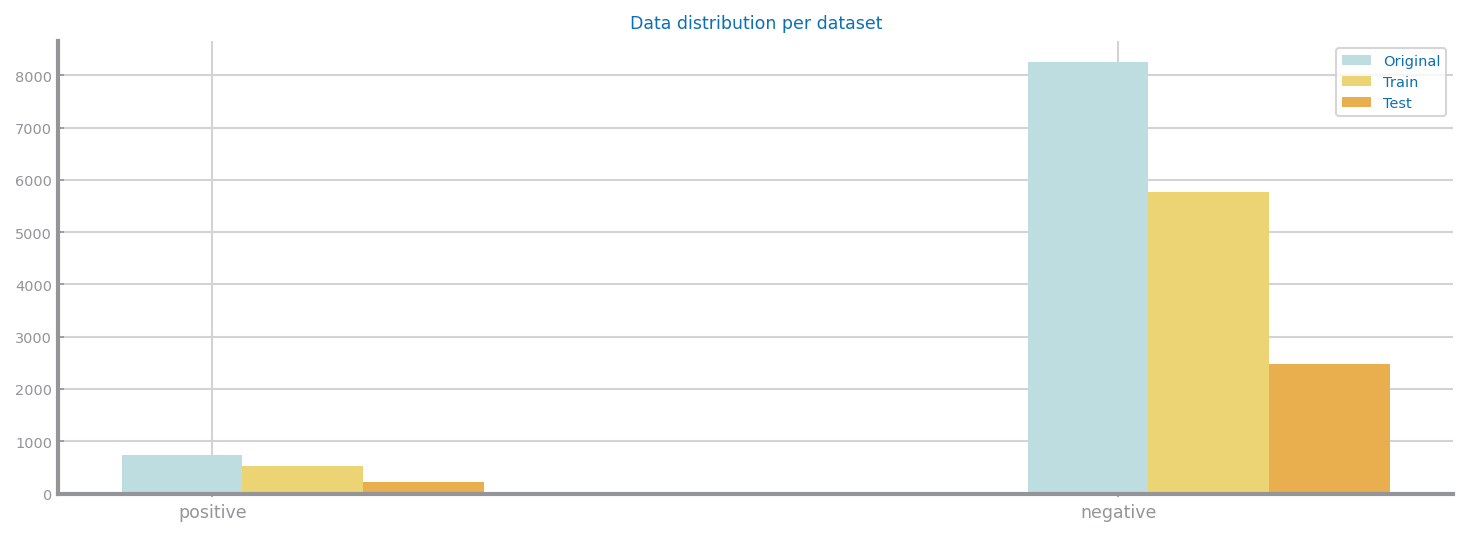

In [3]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY==negative))), len(np.delete(trnY, np.argwhere(trnY==positive)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY==negative))), len(np.delete(tstY, np.argwhere(tstY==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per dataset', showXTickLabels = True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

### Evaluation

---

#### Accuracy
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [4]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnX, trnY)
clf.score(tstX, tstY)

0.7542624166048925

In our example we can see that naive Bayes is better with some splits than others.

#### Confusion Matrix
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [5]:
import numpy as np
import sklearn.metrics as metrics

labels: np.ndarray = pd.unique(y)
prdY: np.ndarray = clf.predict(tstX)
cnf_mtx: np.ndarray = metrics.confusion_matrix(tstY, prdY, labels)
cnf_mtx

array([[1876,  600],
       [  63,  159]])

<Figure size 600x450 with 0 Axes>

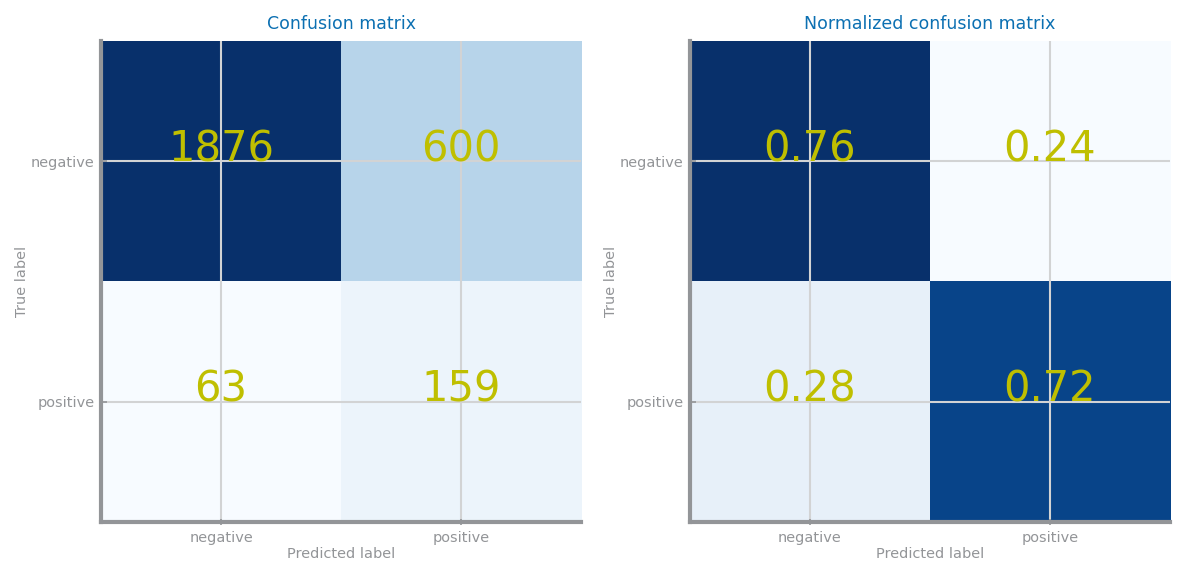

In [6]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray, ax: plt.Axes = None,
                          normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='y', horizontalalignment="center", size=20)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(cnf_mtx, labels, ax=axs[0,0])
plot_confusion_matrix(metrics.confusion_matrix(tstY, prdY, labels), labels, axs[0,1], normalize=True)
plt.tight_layout()
plt.show()

#### Classification metrics

In [7]:
print('Recall Score: ', metrics.recall_score(tstY, prdY, pos_label = 'positive'))
print('Precision Score: ', metrics.precision_score(tstY, prdY, pos_label = 'positive'))
print('F1 Score: ', metrics.f1_score(tstY, prdY, pos_label = 'positive'))
print('Balanced Accuracy Score: ', metrics.balanced_accuracy_score(tstY, prdY))

Recall Score:  0.7162162162162162
Precision Score:  0.20948616600790515
F1 Score:  0.32415902140672787
Balanced Accuracy Score:  0.7369449417106929


## 3.1. Naive Bayes

---

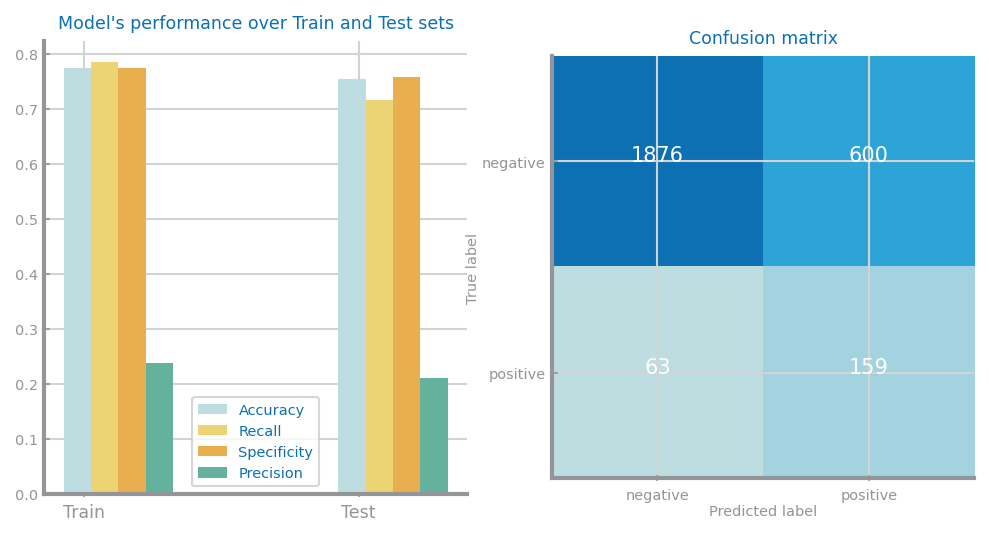

In [8]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst, showXTickLabels=True)

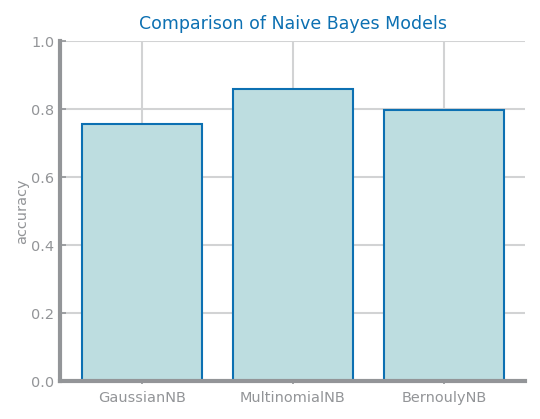

In [9]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
plt.show()

## 3.1. KNN

---

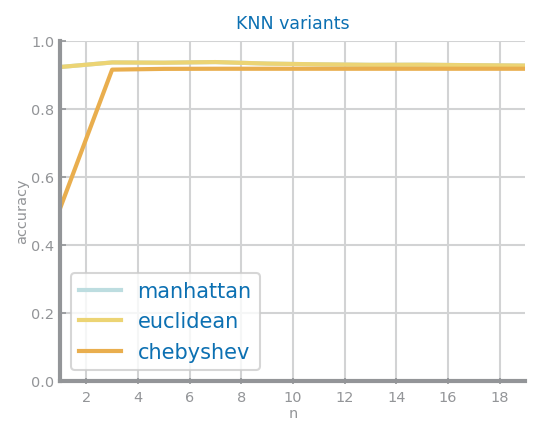

Best results with 7 neighbors and manhattan


In [10]:
from sklearn.neighbors import KNeighborsClassifier
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

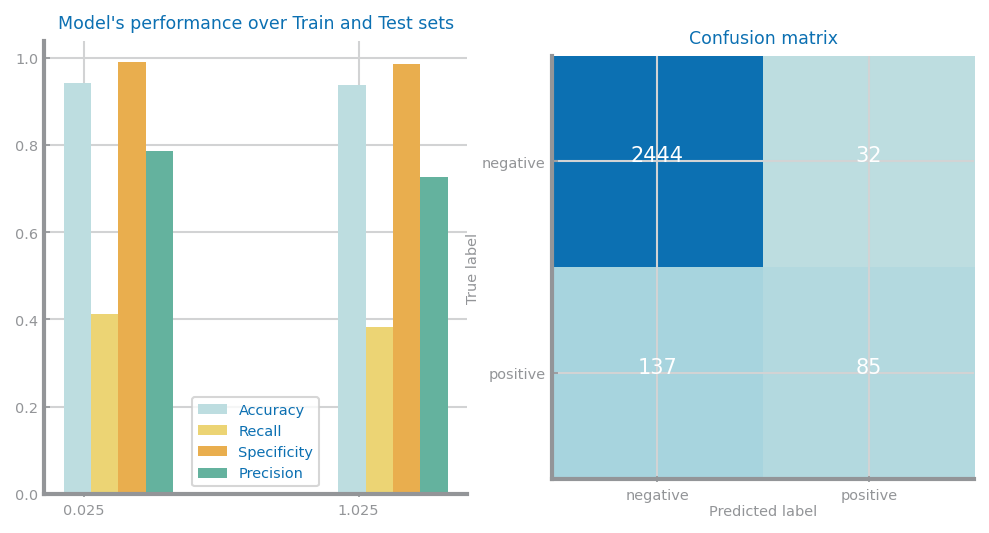

In [11]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)